In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification Tree

In [28]:
# Set a random seed for reproducibility
np.random.seed(17)

# Generate synthetic training data with 100 instances and 2 features for the first class
train_data = np.random.normal(size=(100, 2))

# Create corresponding labels for the first class
train_labels = np.zeros(100)

# Generate synthetic training data with 100 instances and 2 features for the second class,
# centered around loc=2 (to differentiate from the first class)
second_class_data = np.random.normal(size=(100, 2), loc=2)

# Create DataFrames for the first and second class data
first_class_df = pd.DataFrame(data=train_data, columns=["Feature 1", "Feature 2"])
first_class_df["Label"] = train_labels

second_class_df = pd.DataFrame(data=second_class_data, columns=["Feature 1", "Feature 2"])
second_class_df["Label"] = 1

# Combine the first and second class DataFrames using keys for index values
train_df = pd.concat([first_class_df, second_class_df], keys=[0, 1]).reset_index(drop=True)
train_df

,Feature 1,Feature 2,Label
0,0.276266,-1.854628,0.0
1,0.623901,1.145311,0.0
2,1.037190,1.886639,0.0
3,-0.111698,-0.362101,0.0
4,0.148675,-0.437783,0.0
...,...,...,...
195,3.291618,2.683931,1.0
196,2.100323,1.349604,1.0
197,2.445061,2.593534,1.0
198,1.762466,2.085415,1.0


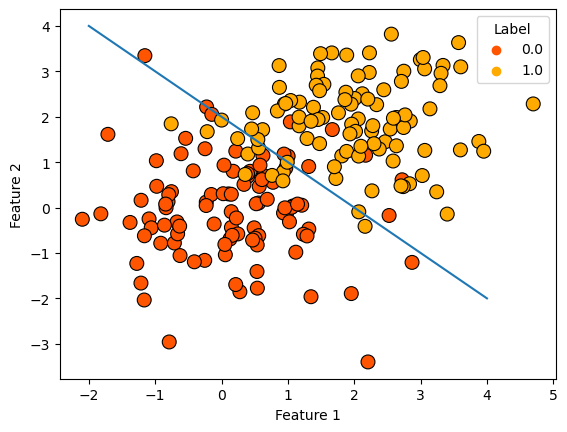

In [30]:
sns.scatterplot(
    data=train_df, 
    x='Feature 1', 
    y='Feature 2', 
    s=100, 
    hue='Label', 
    palette="autumn", 
    edgecolor="black"
)
plt.plot(range(-2, 5), range(4, -3, -1));

In [12]:
from sklearn.tree import DecisionTreeClassifier

X = train_df[['Feature 1', 'Feature 2']].copy()
y = train_df['Label'].copy()
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


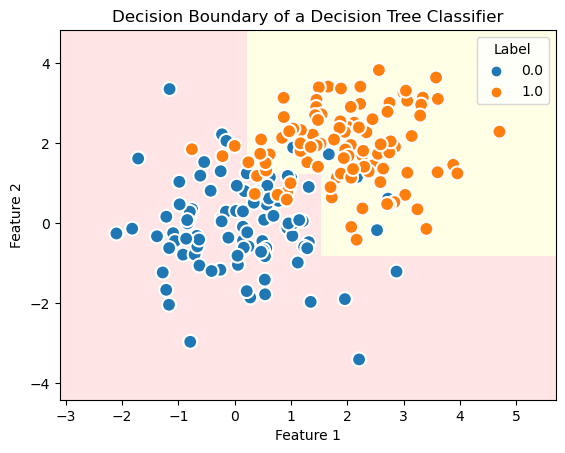

In [31]:
from sklearn.tree import DecisionTreeClassifier

X = train_df[['Feature 1', 'Feature 2']].copy()
y = train_df['Label'].copy()

# Set the column names of the X data
X.columns = ['Feature 1', 'Feature 2']

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)
clf_tree.fit(X, y)


# Generate a grid of points for plotting the decision boundary
def get_grid(data, border=1.0, step=0.01):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    return xx, yy

# Get the grid and predict class labels for each point
xx, yy = get_grid(X.values)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create the scatter plot
plt.pcolormesh(xx, yy, predicted, cmap="autumn", alpha=0.1)  # Plot decision boundary
sns.scatterplot(
    data=train_df, 
    x='Feature 1', 
    y='Feature 2', 
    hue='Label',
    s=100,
    edgecolors="black",
    linewidth=1.5,
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of a Decision Tree Classifier");

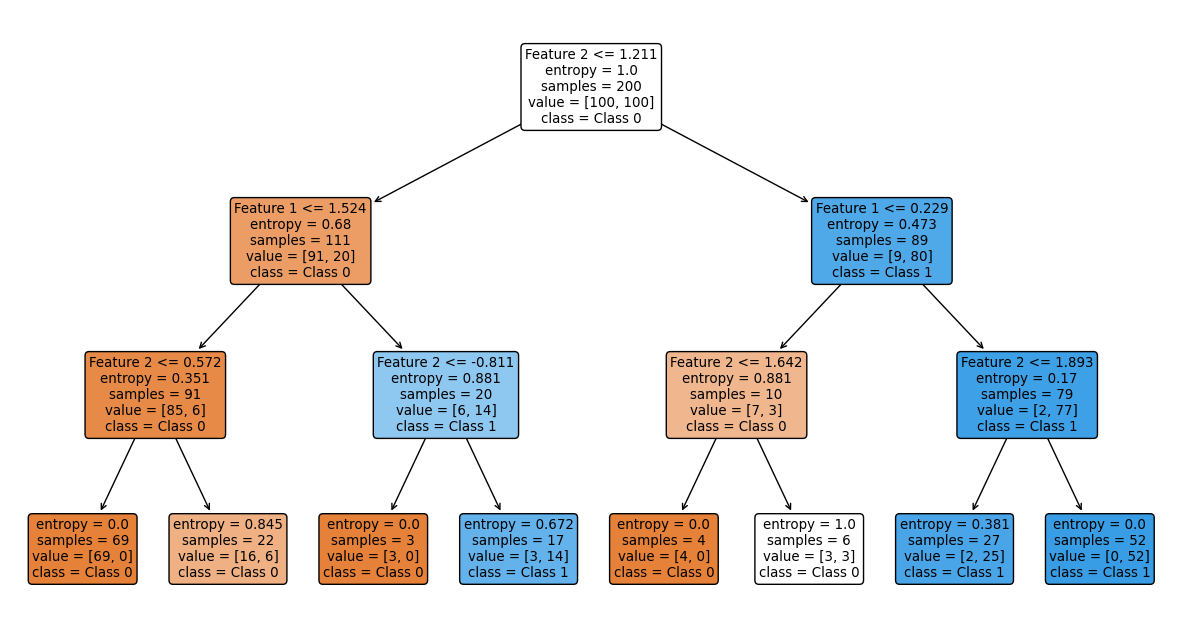

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(clf_tree,
           feature_names=['Feature 1', 'Feature 2'],
           class_names=['Class 0', 'Class 1'],
           filled=True,
           rounded=True);

In [35]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


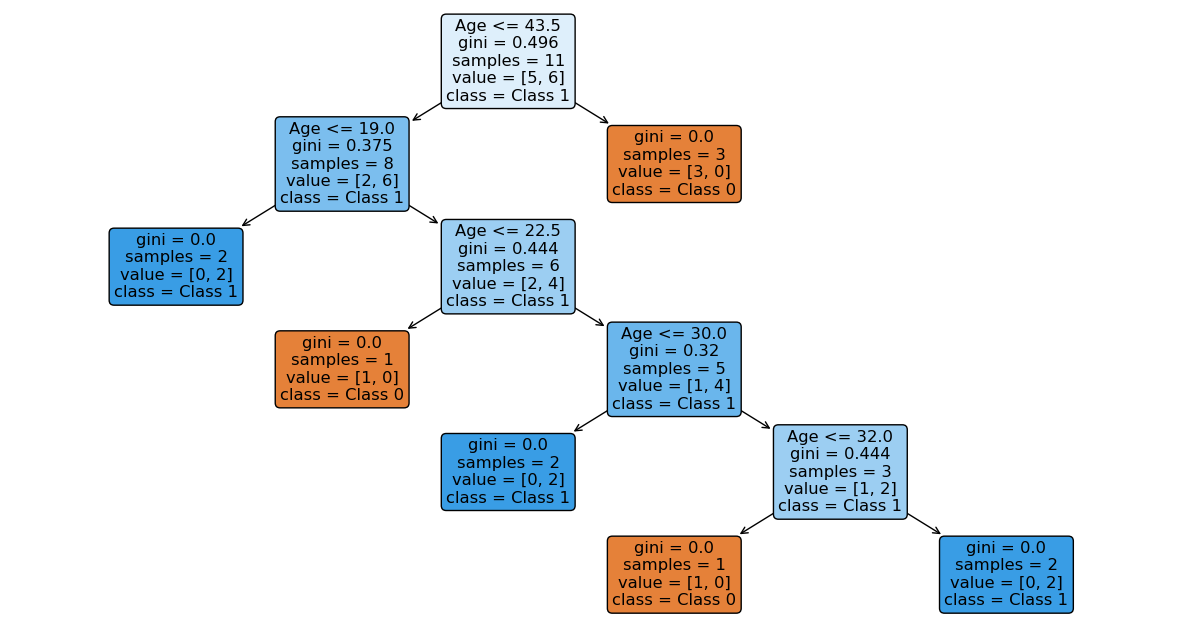

In [37]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)
plt.figure(figsize=(15,8))
plot_tree(
    age_tree,
    feature_names=["Age"],
    class_names=['Class 0', 'Class 1'],
    filled=True, rounded=True
);

In [38]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2.sort_values("Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [39]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values);

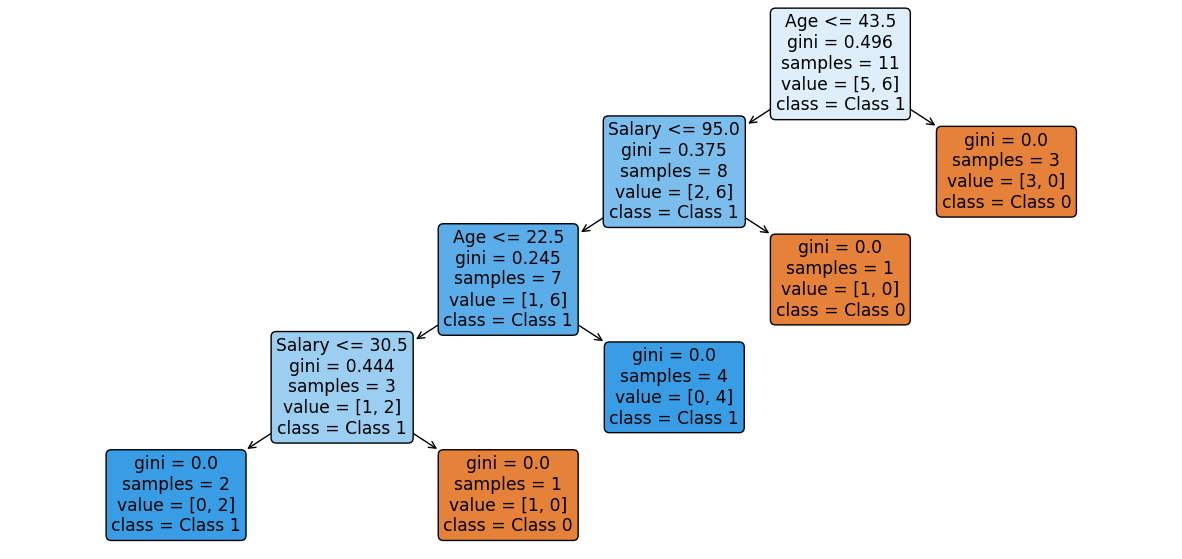

In [51]:
plt.figure(figsize=(15,7))
plot_tree(
    age_sal_tree,
    feature_names=["Age", "Salary"],
    class_names=['Class 0', 'Class 1'],
    filled=True, rounded=True
);

In [52]:
data2.sort_values("Salary")

,Age,Salary,Loan Default
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


# Regression Tree

In [53]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y

In [54]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [55]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

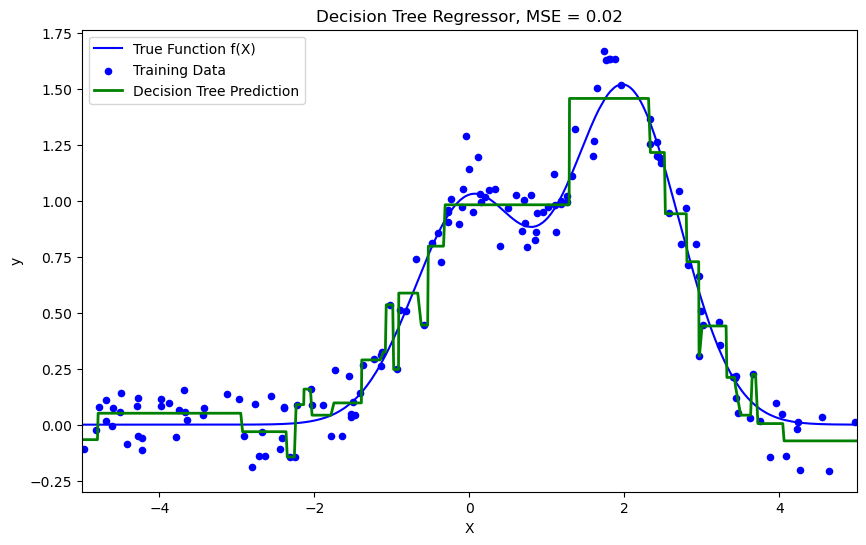

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b", label="True Function f(X)")
plt.scatter(X_train, y_train, c="b", s=20, label="Training Data")
plt.plot(X_test, reg_tree_pred, "g", lw=2, label="Decision Tree Prediction")
plt.xlim([-5, 5])
plt.xlabel("X")
plt.ylabel("y")
plt.title(
    "Decision Tree Regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.legend()
plt.show()


# Decision Trees (DT) & k - Nearest Neighbors (kNN)
## Customer churn prediction task

**Label Encoding (`pd.factorize`):**
- Assigns a unique integer to each category.
- Preserves the ordinal relationship among categories.
- Creates a single column with encoded integer values.
- Suitable for ordinal categorical data.

**One-Hot Encoding (`pd.get_dummies`):**
- Creates new binary columns for each category.
- Does not assume any ordinal relationship among categories.
- Each column represents the presence (1) or absence (0) of a category.
- Suitable for nominal categorical data.

In [69]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

# Label encoding
df["International plan"] = pd.factorize(df["International plan"])[0] # [0] = encoded labels (int) | [1] = unique categories
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]

# Target variable y
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]

# Predicting variables x
df.drop(["State", "Churn"], axis=1, inplace=True)

In [70]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


## Using holdout set

In [72]:
X = df.copy()

In [93]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=17)

In [74]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train);

In [125]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predictions from the decision tree model
tree_preds = tree.predict(X_test)

def calculate_performance_scores(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return pd.DataFrame({
        "Model Name": [model_name],
        "Precision": [precision],
        "Recall": [recall],
        "Accuracy": [accuracy],
        "F1 Score": [f1]
    })

model_name = "Decision Trees Holdout"
performance_df = calculate_performance_scores(model_name, y_test, tree_preds)
performance_df

,Model Name,Precision,Recall,Accuracy,F1 Score
0,Decision Trees Holdout,0.884211,0.631579,0.94,0.736842


<Figure size 800x600 with 0 Axes>

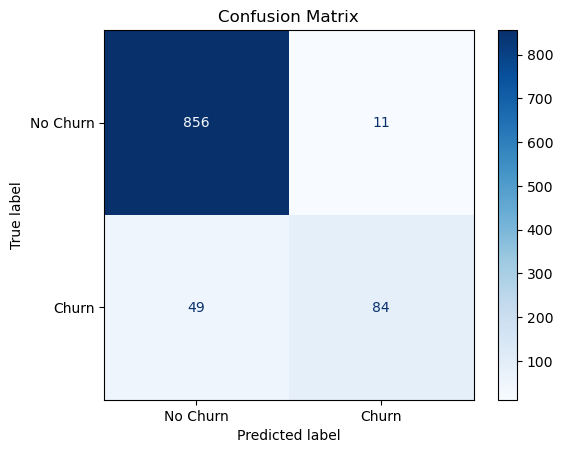

In [126]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, tree_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [127]:
knn_preds = knn.predict(X_test_scaled)

model_name2 = "K-Nearest Neighbor Holdout"
performance_df2 = calculate_performance_scores(model_name2, y_test, knn_preds)
performance_df = pd.concat([performance_df,performance_df2], axis=0)
performance_df

,Model Name,Precision,Recall,Accuracy,F1 Score
0,Decision Trees Holdout,0.884211,0.631579,0.94,0.736842
0,K-Nearest Neighbor Holdout,0.780488,0.240602,0.89,0.367816


<Figure size 800x600 with 0 Axes>

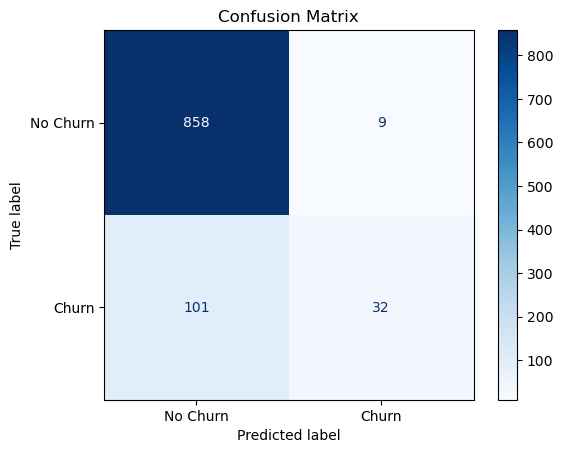

In [128]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, knn_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Using  cross-validation (GridSearchCV)

In [129]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {
    "max_depth": range(1, 11), 
    "max_features": range(4, 19), 
    "min_samples_leaf": range(1,10),
}

tree_grid = GridSearchCV(tree, 
                         tree_params, 
                         cv=5, 
                         n_jobs=-1, 
                         verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19),
                         'min_samples_leaf': range(1, 10)},
             verbose=True)

In [130]:
tree_grid.best_params_

{'max_depth': 7, 'max_features': 11, 'min_samples_leaf': 2}

In [131]:
tree_grid.best_score_

0.9438595362601208

In [132]:
# Predictions from the decision tree model
tree_grid_preds = tree_grid.predict(X_test)

model_name3 = "Decision Trees GridSearchCV"
performance_df3 = calculate_performance_scores(model_name3, y_test, tree_grid_preds)
performance_df = pd.concat([performance_df,performance_df3], axis=0)
performance_df

,Model Name,Precision,Recall,Accuracy,F1 Score
0,Decision Trees Holdout,0.884211,0.631579,0.940,0.736842
0,K-Nearest Neighbor Holdout,0.780488,0.240602,0.890,0.367816
0,Decision Trees GridSearchCV,0.908163,0.669173,0.947,0.770563


<Figure size 800x600 with 0 Axes>

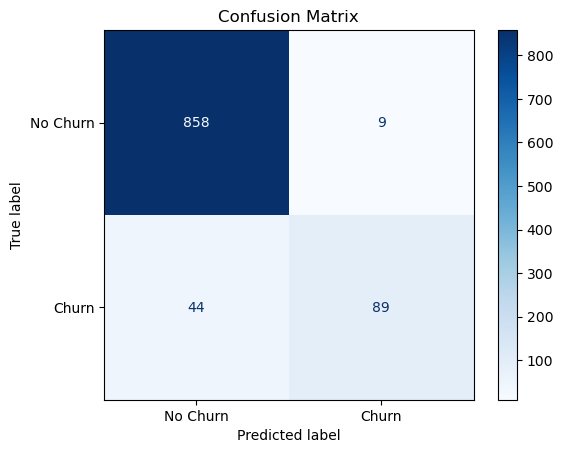

In [133]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, tree_grid_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

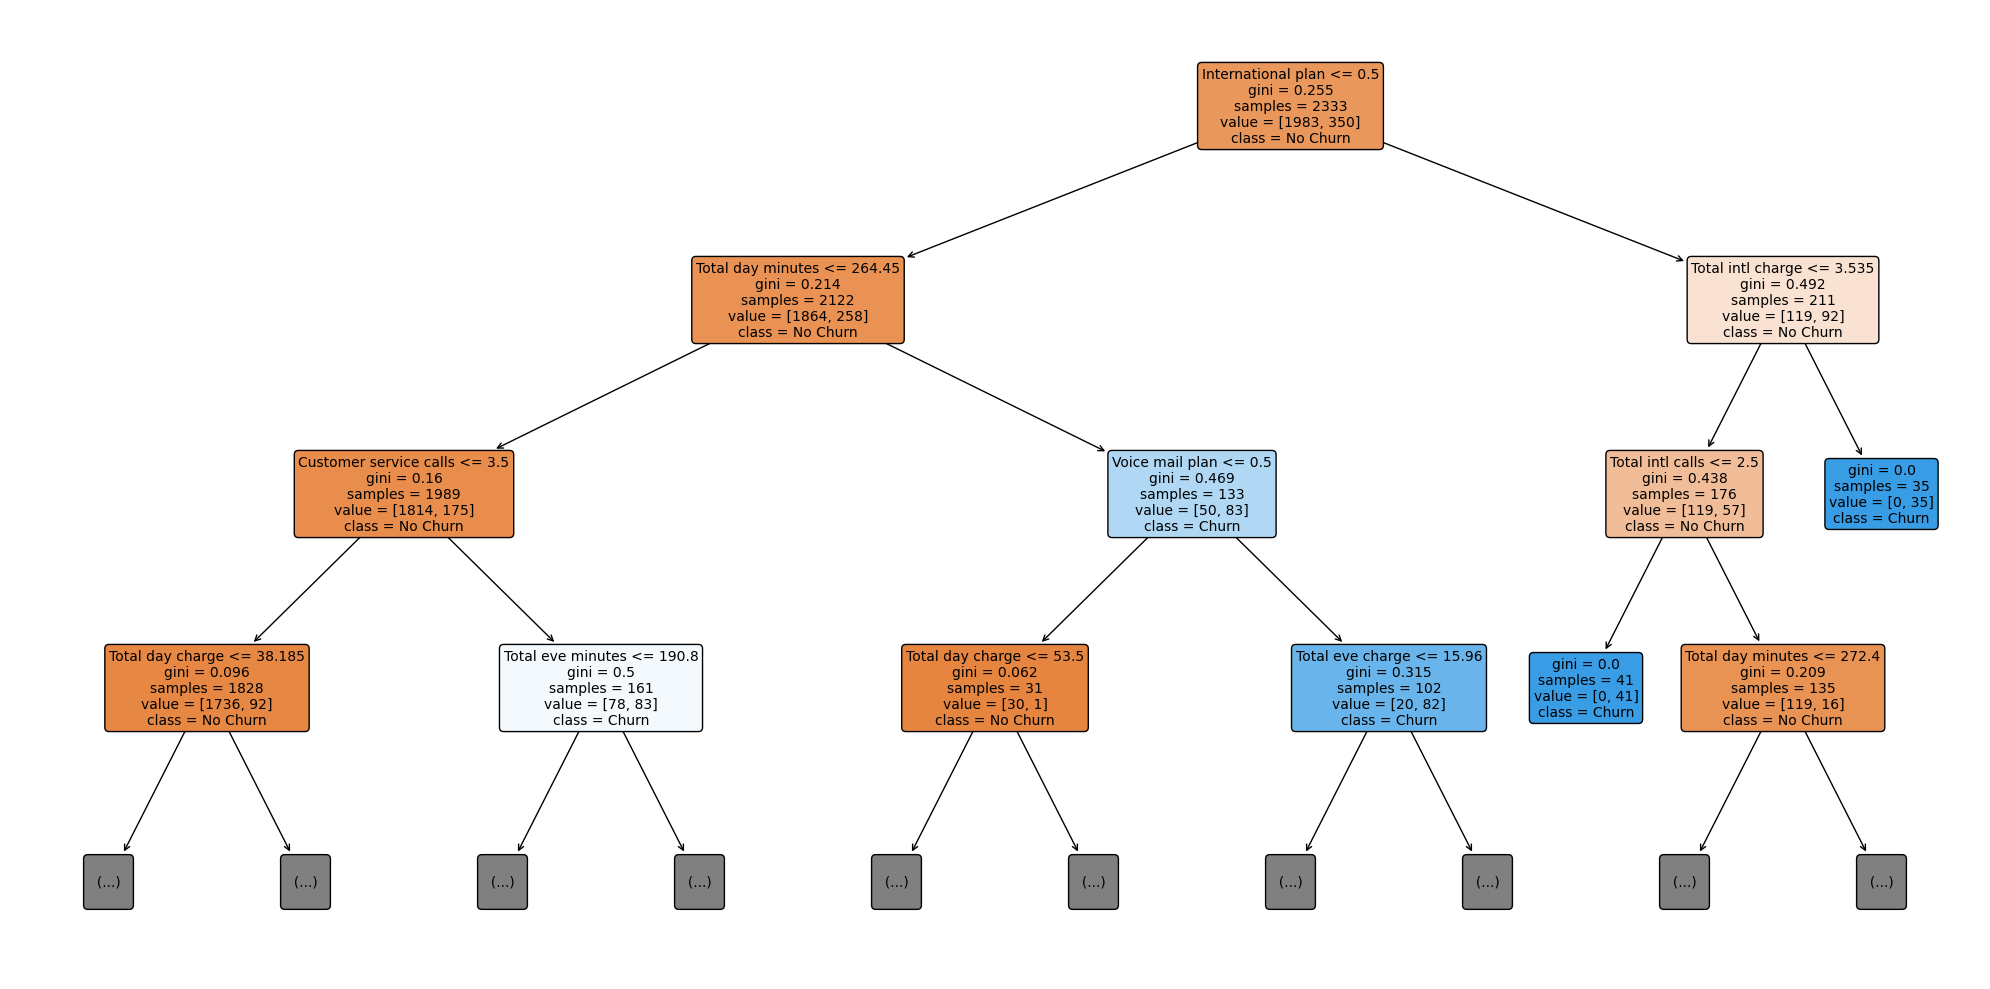

In [134]:
plt.figure(figsize=(20, 10))  
plot_tree(decision_tree=tree_grid.best_estimator_, 
          feature_names=df.columns.to_list(), 
          filled=True, 
          rounded=True, 
          class_names=['No Churn', 'Churn'], 
          fontsize=10, max_depth=3)
plt.tight_layout();

In [135]:
# Create a pipeline with scaling and KNN classifier
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_jobs=-1))  
])

# Define the parameter grid for KNN
knn_params = {
    'knn__n_neighbors': range(1, 10),  # Use 'knn__' prefix to set parameters for the KNeighborsClassifier step
    'knn__weights': ['uniform', 'distance']
}

# Create a grid search object
knn_grid = GridSearchCV(knn_pipe, 
                        knn_params, 
                        cv=5, 
                        n_jobs=-1, 
                        verbose=True)

# Fit the grid search on the training data
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10),
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)

In [136]:
knn_grid.best_params_

{'knn__n_neighbors': 8, 'knn__weights': 'distance'}

In [137]:
knn_grid.best_score_

0.8868469180505647

In [138]:
knn_grid_preds=knn_grid.predict(X_test)

In [139]:
model_name4 = "k-Nearest Neighbors GridSearchCV"
performance_df4 = calculate_performance_scores(model_name4, y_test, knn_grid_preds)
performance_df = pd.concat([performance_df,performance_df4], axis=0)
performance_df

,Model Name,Precision,Recall,Accuracy,F1 Score
0,Decision Trees Holdout,0.884211,0.631579,0.940,0.736842
0,K-Nearest Neighbor Holdout,0.780488,0.240602,0.890,0.367816
0,Decision Trees GridSearchCV,0.908163,0.669173,0.947,0.770563
0,k-Nearest Neighbors GridSearchCV,0.696970,0.345865,0.893,0.462312


<Figure size 800x600 with 0 Axes>

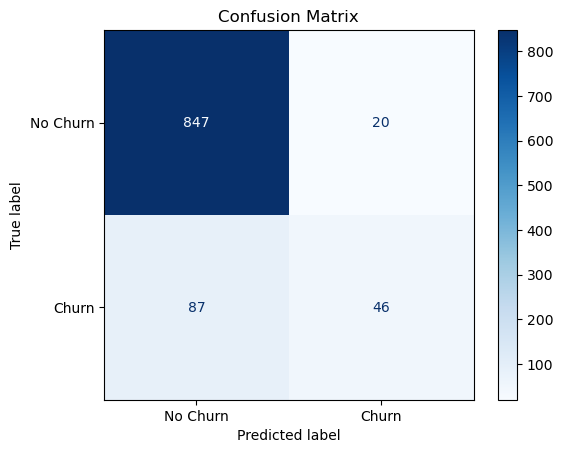

In [140]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, knn_grid_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [142]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators =100, n_jobs=-1, random_state=17)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [143]:
forest_preds = forest.predict(X_test)

model_name5 = "Random Forests Holdout"
performance_df5 = calculate_performance_scores(model_name5, y_test, forest_preds)
performance_df = pd.concat([performance_df,performance_df5], axis=0)
performance_df

,Model Name,Precision,Recall,Accuracy,F1 Score
0,Decision Trees Holdout,0.884211,0.631579,0.940,0.736842
0,K-Nearest Neighbor Holdout,0.780488,0.240602,0.890,0.367816
0,Decision Trees GridSearchCV,0.908163,0.669173,0.947,0.770563
0,k-Nearest Neighbors GridSearchCV,0.696970,0.345865,0.893,0.462312
0,Random Forests Holdout,0.919192,0.684211,0.950,0.784483


<Figure size 800x600 with 0 Axes>

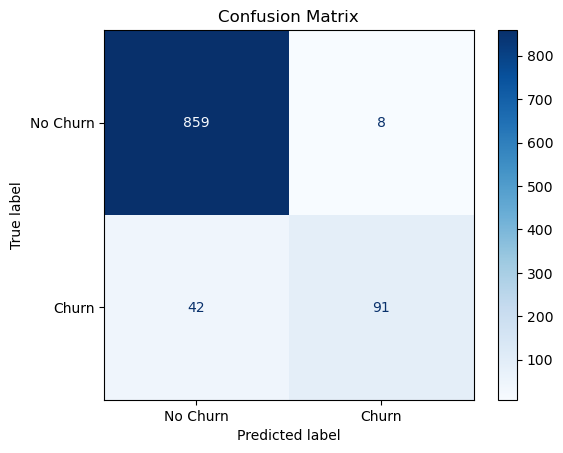

In [152]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, forest_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [147]:
forest_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [6, 10, 20] ,       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] ,     # Minimum number of samples required to be at a leaf node
    'max_features': [5, 10, 20]
}

# Create a grid search object for Random Forest
forest_grid = GridSearchCV(forest, 
                           forest_params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=True)

# Fit the grid search on the training data
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [6, 10, 20], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [148]:
forest_grid.best_params_

{'max_depth': 20,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [149]:
forest_grid.best_score_ 

0.9515701537528376

In [150]:
forest_grid_preds = forest_grid.predict(X_test)

model_name6 = "Random Forests GridSearchCV"
performance_df6 = calculate_performance_scores(model_name6, y_test, forest_grid_preds)
performance_df = pd.concat([performance_df,performance_df6], axis=0)
performance_df

,Model Name,Precision,Recall,Accuracy,F1 Score
0,Decision Trees Holdout,0.884211,0.631579,0.940,0.736842
0,K-Nearest Neighbor Holdout,0.780488,0.240602,0.890,0.367816
0,Decision Trees GridSearchCV,0.908163,0.669173,0.947,0.770563
0,k-Nearest Neighbors GridSearchCV,0.696970,0.345865,0.893,0.462312
0,Random Forests Holdout,0.919192,0.684211,0.950,0.784483
0,Random Forests GridSearchCV,0.906542,0.729323,0.954,0.808333


<Figure size 800x600 with 0 Axes>

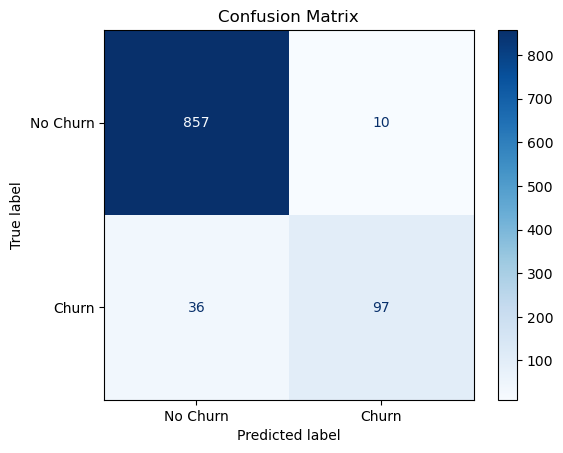

In [151]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, forest_grid_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Complex Case for Decision Trees

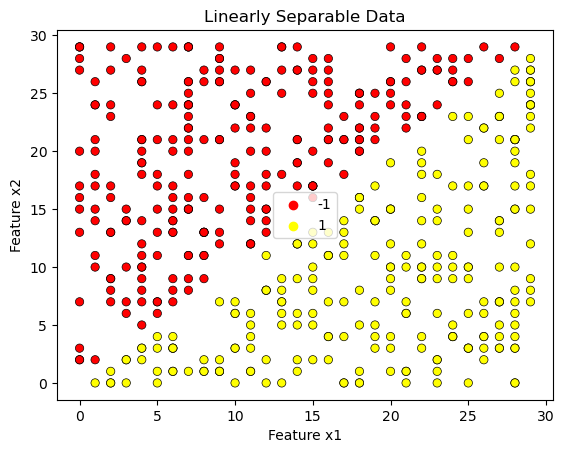

In [153]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    # Initialize empty lists to store data points and corresponding target labels
    data, target = [], []
    
    # Generate 'n' data points
    for i in range(n):
        # Generate random values for feature x1 and x2 within specified ranges
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        
        # Check if the absolute difference between x1 and x2 is greater than 0.5
        # This condition is used to create linearly separable data points
        if np.abs(x1 - x2) > 0.5:
            # Append the data point [x1, x2] to the 'data' list
            data.append([x1, x2])
            
            # Calculate the target label based on the sign of (x1 - x2)
            target.append(np.sign(x1 - x2))
    
    # Convert the lists to NumPy arrays and return them
    return np.array(data), np.array(target)

# Generate linearly separable data using the 'form_linearly_separable_data' function
X, y = form_linearly_separable_data()

# Create a scatter plot using Seaborn to visualize the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="autumn", edgecolor="black")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title("Linearly Separable Data");

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


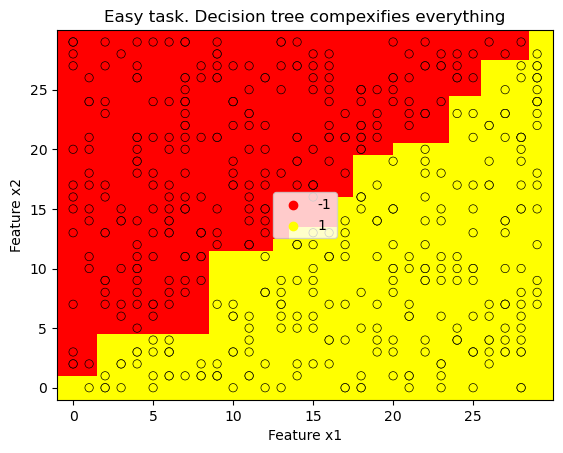

In [156]:
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X, y)

xx, yy = get_grid(X)

predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y, 
                palette="autumn", 
                edgecolor="black")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title("Easy task. Decision tree compexifies everything");

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(tree, 
          filled =True, 
          rounded=True, 
          feature_names = ['x1', 'x2'], 
          fontsize=9)
plt.tight_layout();

In [165]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


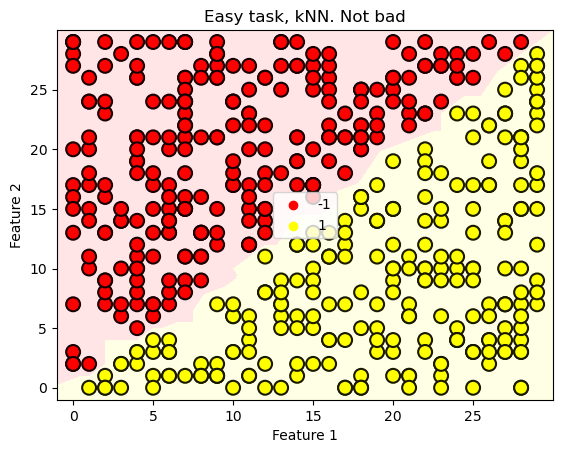

In [167]:
xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
    s=100,
    palette="autumn",
    edgecolor="black"
)
plt.pcolormesh(xx, yy, predicted, cmap="autumn", alpha=0.1)

plt.title("Easy task, kNN. Not bad")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

# Decision Trees and k-NN in a Task of MNIST Handwritten Digits Recognition

In [172]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

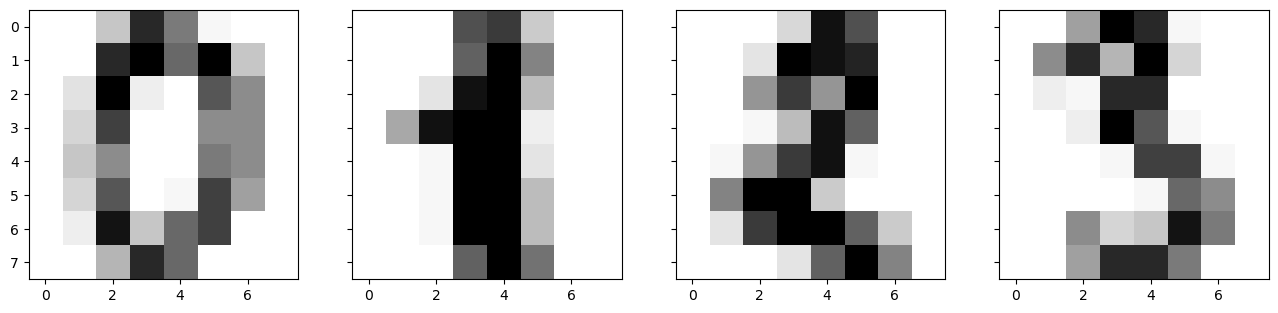

In [173]:
_ , ax = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    ax[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [175]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [178]:
tree_pred = tree.predict(X_test)
knn_pred = knn_pipe.predict(X_test)

In [186]:
def calculate_performance_scores(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    
    score = pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Recall': [recall],
        'Accuracy': [accuracy],
        'F1 Score': [f1]
    })
    
    return score

model_name1 = 'Decision Tree'
model_name2 = 'k-Nearest Neighbors'
score1 = calculate_performance_scores(model_name1, y_test, tree_pred)
score2 = calculate_performance_scores(model_name2, y_test, knn_pred)
score = pd.concat([score1, score2], axis=0)
score

,Model,Precision,Recall,Accuracy,F1 Score
0,Decision Tree,0.722712,0.669733,0.666667,0.661463
0,k-Nearest Neighbors,0.976621,0.976565,0.975926,0.976447


In [187]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [188]:
tree_grid.best_params_, tree_grid.best_score_ 


({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [189]:
tree_grid_pred = tree_grid.predict(X_test)
model_name3 = 'Decision Tree GridSearchCV'
score3 = calculate_performance_scores(model_name3, y_test, tree_grid_pred)
score = pd.concat([score, score3], axis=0)
score

,Model,Precision,Recall,Accuracy,F1 Score
0,Decision Tree,0.722712,0.669733,0.666667,0.661463
0,k-Nearest Neighbors,0.976621,0.976565,0.975926,0.976447
0,Decision Tree GridSearchCV,0.845622,0.843119,0.842593,0.843465


In [193]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
)

knn_params = {
    'knn__n_neighbors': range(1, 10),
    'knn__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_pipe, 
                        knn_params, 
                        cv=5, 
                        n_jobs=-1, 
                        verbose=True)

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=1))]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10),
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)

In [195]:
knn_grid.best_params_, knn_grid.best_score_ 

({'knn__n_neighbors': 1, 'knn__weights': 'uniform'}, 0.9689812179852021)

In [194]:
knn_grid_pred = knn_grid.predict(X_test)
model_name4 = 'k-Nearest Neignbors GridSearchCV'
score4 = calculate_performance_scores(model_name4, y_test, knn_grid_pred)
score = pd.concat([score, score4], axis=0)
score

,Model,Precision,Recall,Accuracy,F1 Score
0,Decision Tree,0.722712,0.669733,0.666667,0.661463
0,k-Nearest Neighbors,0.976621,0.976565,0.975926,0.976447
0,Decision Tree GridSearchCV,0.845622,0.843119,0.842593,0.843465
0,k-Nearest Neignbors GridSearchCV,0.845622,0.843119,0.842593,0.843465
0,k-Nearest Neignbors GridSearchCV,0.970703,0.970985,0.970370,0.970510
0,k-Nearest Neignbors GridSearchCV,0.970703,0.970985,0.970370,0.970510


In [196]:
forest_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [6, 10, 20] ,       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] ,     # Minimum number of samples required to be at a leaf node
    'max_features': [5, 10, 20]
}

# Create a grid search object for Random Forest
forest_grid = GridSearchCV(forest, 
                           forest_params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=True)

# Fit the grid search on the training data
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [6, 10, 20], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [197]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 20,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.9777335104028332)

In [198]:
forest_grid_pred = forest_grid.predict(X_test)
model_name5 = 'Random Forests GridSearchCV'
score5 = calculate_performance_scores(model_name5, y_test, forest_grid_pred)
score = pd.concat([score, score5], axis=0)
score

,Model,Precision,Recall,Accuracy,F1 Score
0,Decision Tree,0.722712,0.669733,0.666667,0.661463
0,k-Nearest Neighbors,0.976621,0.976565,0.975926,0.976447
0,Decision Tree GridSearchCV,0.845622,0.843119,0.842593,0.843465
0,k-Nearest Neignbors GridSearchCV,0.845622,0.843119,0.842593,0.843465
0,k-Nearest Neignbors GridSearchCV,0.970703,0.970985,0.970370,0.970510
0,k-Nearest Neignbors GridSearchCV,0.970703,0.970985,0.970370,0.970510
0,Random Forests GridSearchCV,0.965351,0.965278,0.964815,0.964783


# Complex Case for the Nearest Neighbors Method

In [208]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()

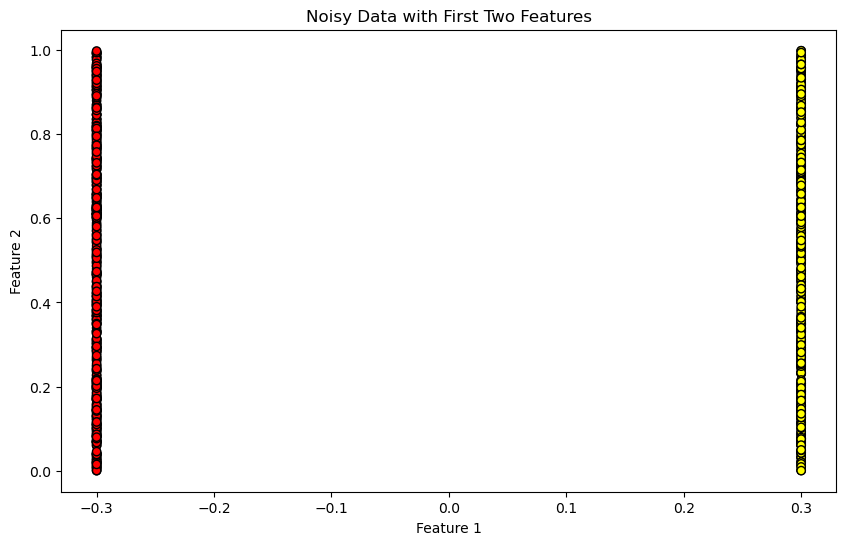

In [209]:
# Plot the first two features
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", edgecolors="black")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Noisy Data with First Two Features")
plt.show()

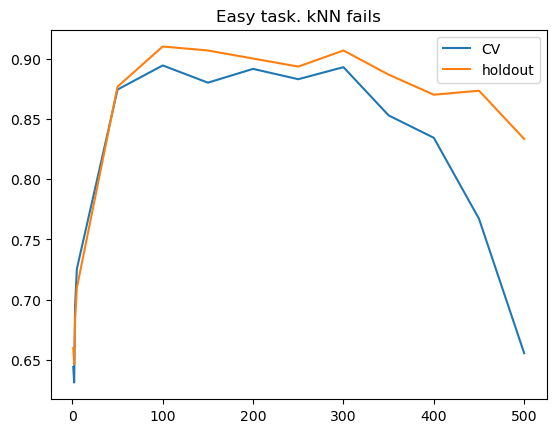

In [200]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [201]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0
